In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
from scipy.stats import skewtest, kurtosistest

#%matplotlib notebook

#フォント設定
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
#plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 24 # 全体のフォントサイズが変更されます。24
plt.rcParams['xtick.labelsize'] = 20 # 軸だけ変更されます。20
plt.rcParams['ytick.labelsize'] = 20 # 軸だけ変更されます20


#軸設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛りの向き
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛りの向き
#plt.rcParams['axes.grid'] = True # グリッドの作成
#plt.rcParams['grid.linestyle']='--' #グリッドの線種
#plt.rcParams["xtick.minor.visible"] = True  #x軸補助目盛りの追加
#plt.rcParams["ytick.minor.visible"] = True  #y軸補助目盛りの追加
#plt.rcParams['xtick.top'] = True  #x軸の上部目盛り
#plt.rcParams['ytick.right'] = True  #y軸の右部目盛り


#軸大きさ
#plt.rcParams["xtick.major.width"] = 1.0             #x軸主目盛り幅線の線
#plt.rcParams["ytick.major.width"] = 1.0             #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0             #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0             #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 10               #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 10               #y軸主目盛り線の長さ
#plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
#plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
plt.rcParams["axes.linewidth"] = 2.0                #囲みの太さ


#凡例設定
plt.rcParams["legend.fancybox"] = False  # 丸角OFF
plt.rcParams["legend.framealpha"] = 1  # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.edgecolor"] = 'black'  # edgeの色を変更
plt.rcParams["legend.markerscale"] = 5 #markerサイズの倍率

In [3]:
# データの読み込み
file_path = "For_Transaction_data_Comparison.csv"
df = pd.read_csv(file_path)
df

,No,Growth_rate_of_total_assets_1,positive_count_1,negative_count_1,Median number of shares purchased_1,Med_purchase_num_1,Max_purchase_num_1,Total number of shares purchased_1,Med stock price at time of purchase_1,Med stock price change rate at time of purchase_1,...,Max_purchase_num_4,Total number of shares purchased_4,Med stock price at time of purchase_4,Med stock price change rate at time of purchase_4,Med number of shares sold_4,Med_disposal_num_4,Max_disposal_num_4,Total number of shares sold_4,Med stock price at time of sale_4,Med stock price change rate at time of sale_4
0,1,7.942774,5,6,0,100,100,500,2168.0,-20.760574,...,100,400,4618.0,-9.679936,0,100,100,300,6282.0,6.622095
1,2,30.329246,9,9,0,100,800,1900,2042.0,-20.760574,...,700,1800,4581.0,-8.544620,0,200,500,2000,5781.0,11.819379
2,3,9.782183,4,3,0,150,300,700,2353.5,-11.317694,...,400,800,4455.0,-10.846508,0,300,300,600,6490.0,4.509091
3,4,35.312727,10,6,0,200,500,2600,2267.5,-12.578519,...,300,1100,4781.0,-14.422880,0,300,500,1300,5427.0,13.045882
4,5,10.778879,5,3,0,100,300,700,1970.0,-18.173432,...,1000,2300,4455.0,-10.846508,0,500,500,2500,6135.0,10.916335
5,6,48.258581,6,8,0,350,800,2400,2069.0,-21.863973,...,200,600,4455.0,-8.513365,0,100,100,200,6490.0,4.509091
6,7,36.516602,10,8,0,300,400,3000,2633.5,3.291977,...,300,500,4577.0,-15.230556,0,100,200,700,5427.0,6.945036
7,8,69.091215,5,2,0,100,1000,1800,2217.0,-2.385787,...,500,1700,4637.5,-11.430752,0,200,300,1200,6208.5,12.548553
8,9,100.391959,8,6,0,500,1000,3700,1970.0,-20.760574,...,1000,2300,4581.0,-10.846508,0,400,800,2600,5427.0,12.051223
9,10,50.198779,5,6,0,300,500,1600,1970.0,-21.854071,...,200,600,4455.0,-8.544620,0,100,100,100,5062.0,8.208636


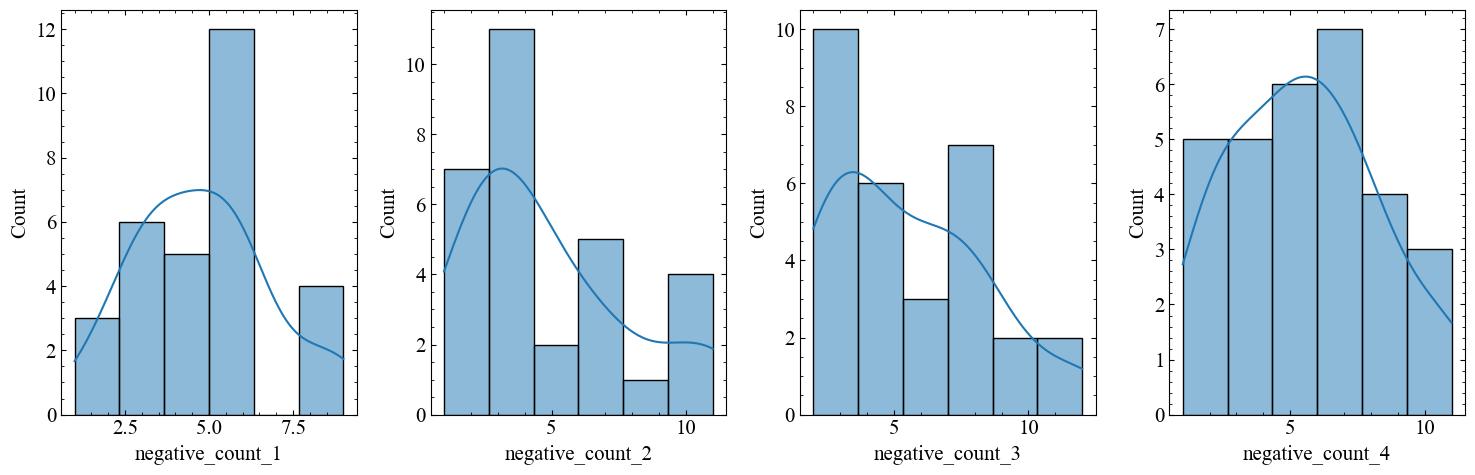

In [7]:
# 度数分布表とヒストグラムをプロット
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))  # 必要に応じて図のサイズを調整 figsize=(8,5)

# ヒストグラムをプロット
for i, col in enumerate(['negative_count_1', 'negative_count_2', 'negative_count_3', 'negative_count_4']):
    ax = axes[i]
    #ax.set_title(f'Histogram with KDE - {col}')
    sns.histplot(df[col], bins='auto', kde=True, ax=ax)
#plt.title('Boxplots for Kd/|Kp|')
plt.tight_layout()
plt.savefig("Histogram/negative_count_Histogram_with_KDE.png")
plt.show()

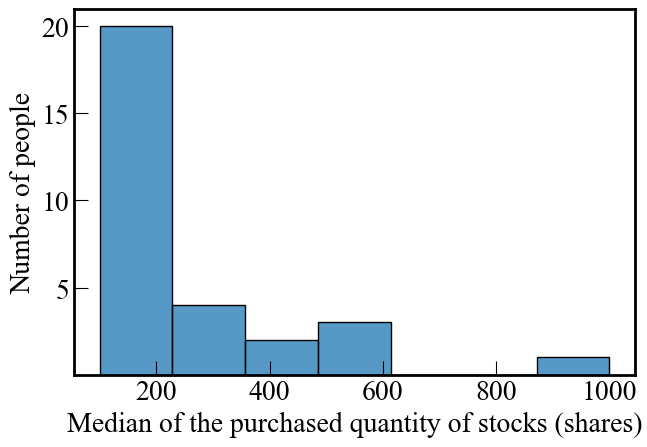

In [8]:
# Med_purchase_num_3列のデータを取得
data = df['Med_purchase_num_1']
#Med_purchase_num_1 Med_disposal_num
# ヒストグラムをプロット
plt.figure(figsize=(7, 5))

#bins = [0,300, 600, 900, 1200]
#bins = [200, 400, 600, 800, 1000]
#bins = [0, 400, 800, 1200, 1600, 2000]
#sns.histplot(data, bins=bins, kde=None)
sns.histplot(data, bins='auto', kde=None)
plt.xlabel('Median of the purchased quantity of stocks (shares)', fontsize=20)#, fontsize=20
plt.ylabel('Number of people', fontsize=20)#, fontsize=20

# メモリラベルのフォントサイズを設定
plt.tick_params(axis='both')#, labelsize=18

# x軸メモリの主メモリの補助線の長さを長くする    
plt.tick_params(axis='x', which='major', length=10)
# x軸の目盛りを手動で設定
#plt.xticks(bins)
plt.yticks([5, 10, 15, 20])

# x軸メモリの補助目盛りの補助線の長さを5にする
#plt.tick_params(axis='x', which='minor', length=5)
# 補助線のメモリの長さを設定
plt.tick_params(axis='both', which='major', length=10)
plt.tick_params(axis='both', which='minor', length=5)

plt.tight_layout()
#plt.savefig("卒論用2/Med_disposal_num_3_histogram.png")
plt.show()


In [39]:
hist, bin_edges = np.histogram(df['Med_purchase_num_1'], bins=bins)

# 階級、階級値、度数、相対度数、累積相対度数を計算
df_hist2 = pd.DataFrame({
    
    '階級': [f'{bin_edges[i]:f} ~ {bin_edges[i+1]:f}' for i in range(len(bin_edges)-1)],
    '階級値': [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges)-1)],
    '度数': hist,
    '相対度数(%)': (hist / len(df))*100,
    '累積相対度数(%)': (np.cumsum(hist) / len(df))*100
})

# 結果を表示
print(df_hist2)
#df_hist2.to_csv('Med_purchase_num_3_度数分布.csv', index=False,encoding='shift-jis')  # 出力先のファイル名に適宜変更

                         階級    階級値  度数    相対度数(%)   累積相対度数(%)
0     0.000000 ~ 200.000000  100.0  12  40.000000   40.000000
1   200.000000 ~ 400.000000  300.0  12  40.000000   80.000000
2   400.000000 ~ 600.000000  500.0   5  16.666667   96.666667
3   600.000000 ~ 800.000000  700.0   0   0.000000   96.666667
4  800.000000 ~ 1000.000000  900.0   1   3.333333  100.000000


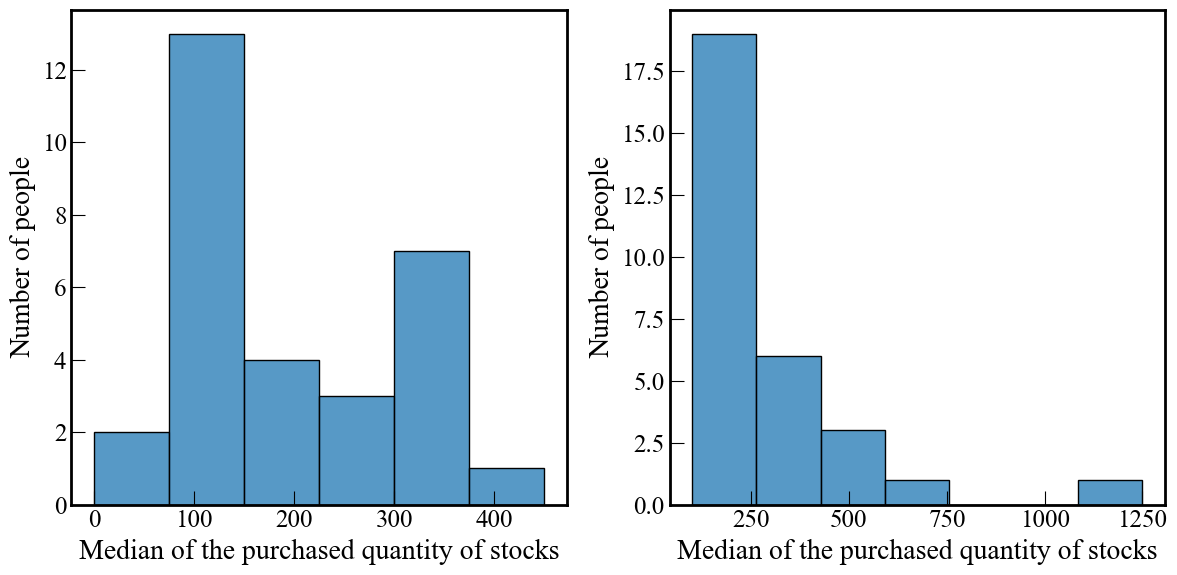

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# ヒストグラムをプロット
'''fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for i, (col, xlabel) in enumerate(zip(['Med_purchase_num_1'], ['Median of the purchased quantity of stocks'])):
    ax = axes[i]
    sns.histplot(df[col], bins='auto', kde=None, ax=ax)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel('Number of people', fontsize=20)
    #ax.set_ylabel('Number of people')'''
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# ヒストグラムをプロット
for i, (col, xlabel) in enumerate(zip(['Med_purchase_num_2', 'Med_purchase_num_3'], ['Median of the purchased quantity of stocks', 'Median of the purchased quantity of stocks'])):
    ax = axes[i]
    sns.histplot(df[col], bins='auto', kde=None, ax=ax)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel('Number of people', fontsize=20)
    #ax.set_ylabel('Number of people')
    # メモリラベルのフォントサイズを15に設定
    ax.tick_params(axis='both', labelsize=18)
    
    # 右側の補助目盛りを非表示
    ax.yaxis.set_ticks_position('left')

    # 特定の補助目盛りを設定（ここでは5, 10, 15, 20）
    #ax.set_yticks([5, 10, 15, 20])

    # 上部目盛りを非表示
    ax.xaxis.set_ticks_position('bottom')

    # 主メモリの補助線の長さを長くする
    ax.tick_params(axis='y', which='major', length=10)
    # 補助目盛りの補助線の長さを5にする
    ax.tick_params(axis='y', which='minor', length=5)

    # x軸メモリの主メモリの補助線の長さを長くする
    ax.tick_params(axis='x', which='major', length=10)

    # x軸メモリの補助目盛りの補助線の長さを5にする
    ax.tick_params(axis='x', which='minor', length=5)

plt.tight_layout()
plt.savefig("23_Med_purchased.png")#disposal  Med_purchase
plt.show()



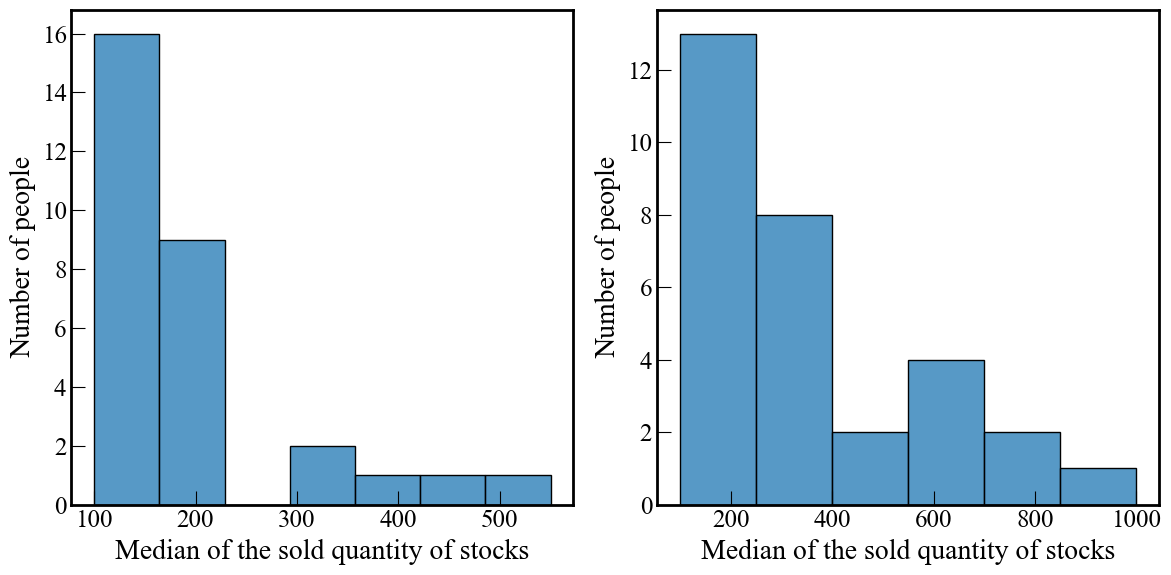

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# ヒストグラムをプロット
for i, (col, xlabel, xtick_interval) in enumerate(zip(['Med_disposal_num_2', 'Med_disposal_num_3'], ['Median of the sold quantity of stocks', 'Median of the sold quantity of stocks'], [200, 100])):
    ax = axes[i]
    sns.histplot(df[col], bins='auto', kde=None, ax=ax)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel('Number of people', fontsize=20)

    # メモリラベルのフォントサイズを15に設定
    ax.tick_params(axis='both', labelsize=18)

    # 右側の補助目盛りを非表示
    ax.yaxis.set_ticks_position('left')

    # 特定の補助目盛りを設定（ここでは5, 10, 15, 20）
    #ax.set_yticks([5, 10, 15, 20])

    # 上部目盛りを非表示
    ax.xaxis.set_ticks_position('bottom')

    # x軸メモリの主メモリの補助線の長さを長くする
    ax.tick_params(axis='x', which='major', length=10)

    # x軸メモリの補助目盛りの補助線の長さを5にする
    ax.tick_params(axis='x', which='minor', length=5)

    # x軸メモリの目盛りを設定
    #ax.set_xticks(range(0, int(df[col].max()) + 1, xtick_interval))

plt.tight_layout()
plt.savefig("23_Med_sold_num.png")
plt.show()


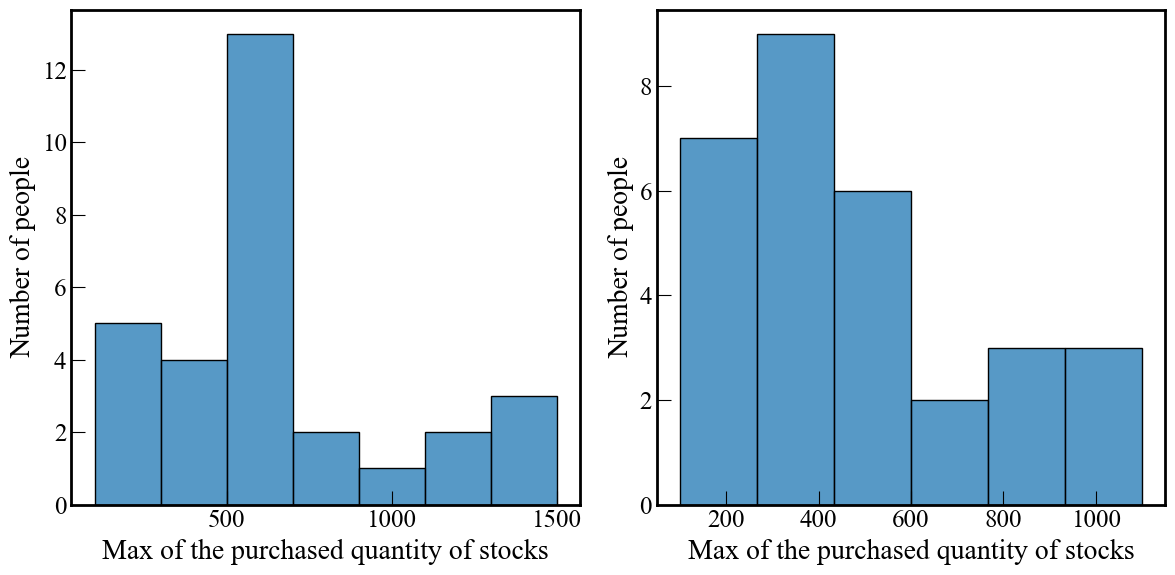

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# データフレーム df が未定義の場合は仮に定義
# df = ...

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# ヒストグラムをプロット
for i, (col, xlabel) in enumerate(zip(['Med_disposal_num_3', 'Med_disposal_num_4'], ['Median of the purchased quantity of stocks', 'Median of the purchased quantity of stocks'])):
    ax = axes[i]
    sns.histplot(df[col], bins='auto', kde=None, ax=ax)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel('Number of people', fontsize=20) 
    ax.tick_params(axis='both', labelsize=18)
    # 特定の補助目盛りを設定（ここでは5, 10, 15, 20）
    #ax.set_yticks([5, 10, 15, 20])
    # 上部目盛りを非表示
    ax.xaxis.set_ticks_position('bottom')
        # 右側の補助目盛りを非表示
    ax.yaxis.set_ticks_position('left')
          # 主メモリの補助線の長さを長くする
    ax.tick_params(axis='y', which='major', length=10)
        # 補助目盛りの補助線の長さを5にする
    ax.tick_params(axis='y', which='minor', length=5)

    # x軸メモリの主メモリの補助線の長さを長くする
    ax.tick_params(axis='x', which='major', length=10)

    # x軸メモリの補助目盛りの補助線の長さを5にする
    ax.tick_params(axis='x', which='minor', length=5)
    # 中央値を取得
    #median_value = df[col].median()

    # 中央値をグラフにテキストとして追加
    #ax.text(median_value, 0, f'Median: {median_value:.2f}', verticalalignment='bottom', horizontalalignment='right', color='red', fontsize=10)

    # ヒストグラムの度数を取得
    bin_edges, bin_counts, _ = ax.hist(df[col], bins='auto', alpha=0)

plt.tight_layout()
plt.savefig("Histogram/卒論用/3rdand4th_Max_disposal_num1.png")
plt.show()


In [34]:
# ヒストグラムを作成Med_purchase_num_3', 'Med_purchase_num_ 'auto'
hist, bin_edges = np.histogram(df['Med_purchase_num_3'], bins=5)

# 階級、階級値、度数、相対度数、累積相対度数を計算
df_hist2 = pd.DataFrame({
    
    '階級': [f'{bin_edges[i]:f} ~ {bin_edges[i+1]:f}' for i in range(len(bin_edges)-1)],
    '階級値': [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges)-1)],
    '度数': hist,
    '相対度数(%)': (hist / len(df))*100,
    '累積相対度数(%)': (np.cumsum(hist) / len(df))*100
})

# 結果を表示
print(df_hist2)
#df_hist2.to_csv('Med_purchase_num_3_度数分布.csv', index=False,encoding='shift-jis')  # 出力先のファイル名に適宜変更

                          階級     階級値  度数    相対度数(%)   累積相対度数(%)
0    100.000000 ~ 330.000000   215.0  21  70.000000   70.000000
1    330.000000 ~ 560.000000   445.0   7  23.333333   93.333333
2    560.000000 ~ 790.000000   675.0   1   3.333333   96.666667
3   790.000000 ~ 1020.000000   905.0   0   0.000000   96.666667
4  1020.000000 ~ 1250.000000  1135.0   1   3.333333  100.000000


In [36]:
# Specify the columns for which you want to calculate statistics
columns_of_interest = ['Med_purchase_num_1', 'Med_purchase_num_2', 'Med_purchase_num_3', 'Med_purchase_num_4']

# Calculate basic statistics for the specified columns
statistics = df[columns_of_interest].describe()

# Display the statistics

print(statistics)
# 結果をCSVファイルに書き込む
statistics.to_csv('BasicStatist/Med_purchase_num_BA.csv', index=False,encoding='shift-jis')  # 出力先のファイル名に適宜変更

       Med_purchase_num_1  Med_purchase_num_2  Med_purchase_num_3  \
count           30.000000           30.000000           30.000000   
mean           248.333333          183.333333          278.333333   
std            192.749316          114.721051          249.026842   
min            100.000000            0.000000          100.000000   
25%            100.000000          100.000000          100.000000   
50%            200.000000          125.000000          200.000000   
75%            300.000000          287.500000          387.500000   
max           1000.000000          450.000000         1250.000000   

       Med_purchase_num_4  
count           30.000000  
mean           251.666667  
std            179.790747  
min            100.000000  
25%            100.000000  
50%            200.000000  
75%            287.500000  
max            800.000000  


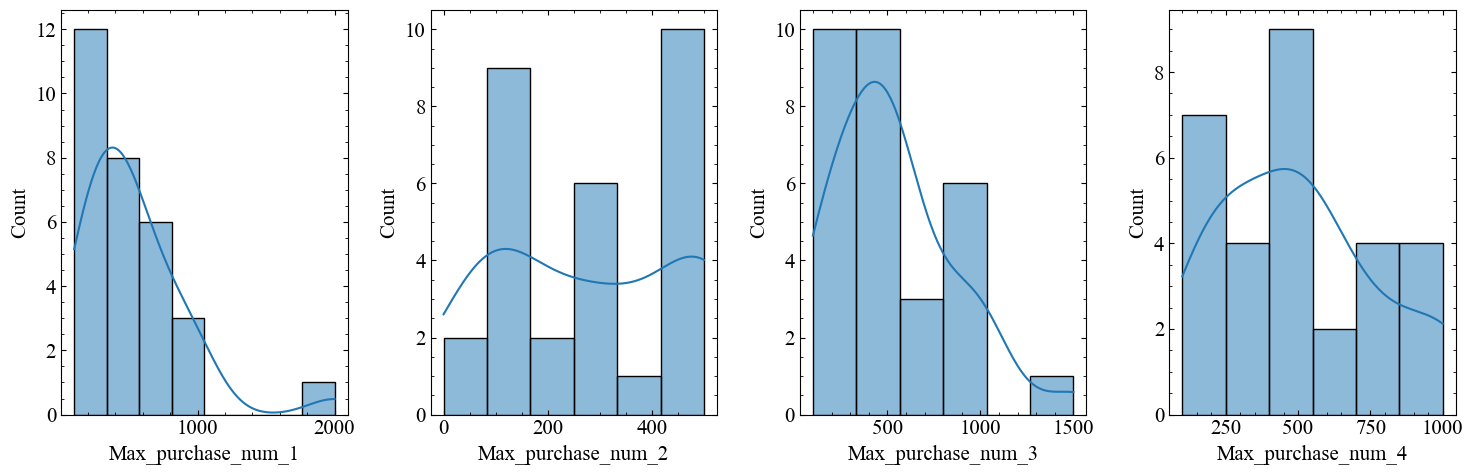

In [37]:
# 度数分布表とヒストグラムをプロット
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))  # 必要に応じて図のサイズを調整 figsize=(8,5)

# ヒストグラムをプロット
for i, col in enumerate(['Max_purchase_num_1', 'Max_purchase_num_2', 'Max_purchase_num_3', 'Max_purchase_num_4']):
    ax = axes[i]
    #ax.set_title(f'Histogram with KDE - {col}')
    sns.histplot(df[col], bins='auto', kde=True, ax=ax)

plt.tight_layout()
plt.savefig("Max_purchase_num__Histogram_with_KDE.png")
plt.show()

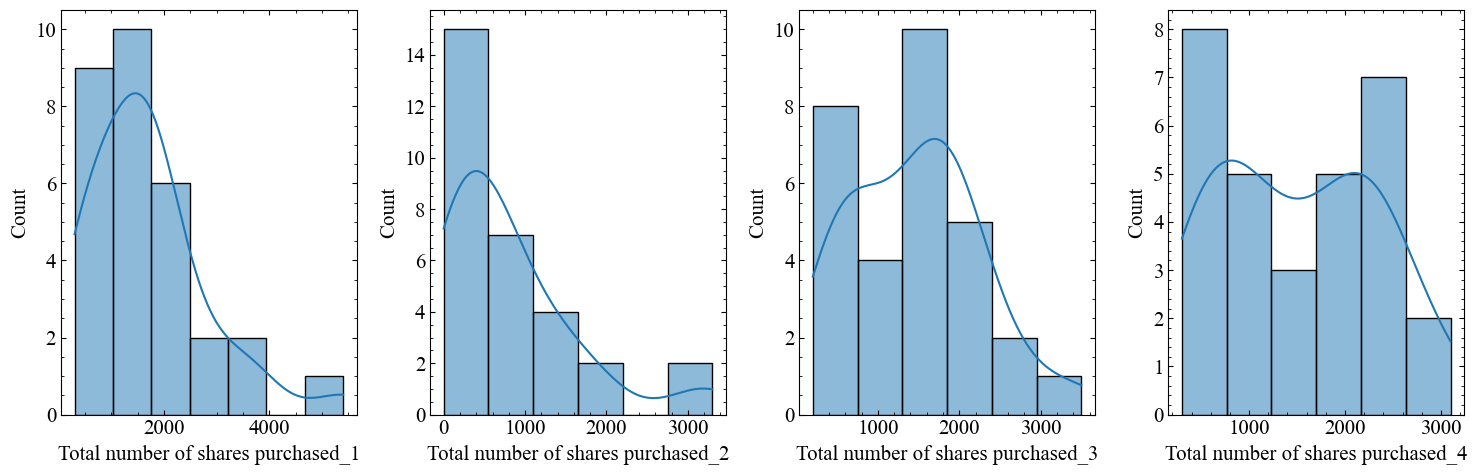

In [38]:
# 度数分布表とヒストグラムをプロット
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))  # 必要に応じて図のサイズを調整 figsize=(8,5)

# ヒストグラムをプロット
for i, col in enumerate(['Total number of shares purchased_1', 'Total number of shares purchased_2', 'Total number of shares purchased_3', 'Total number of shares purchased_4']):
    ax = axes[i]
    #ax.set_title(f'Histogram with KDE - {col}')
    sns.histplot(df[col], bins='auto', kde=True, ax=ax)

plt.tight_layout()
plt.savefig("Total number of shares purchased_Histogram_with_KDE.png")
plt.show()

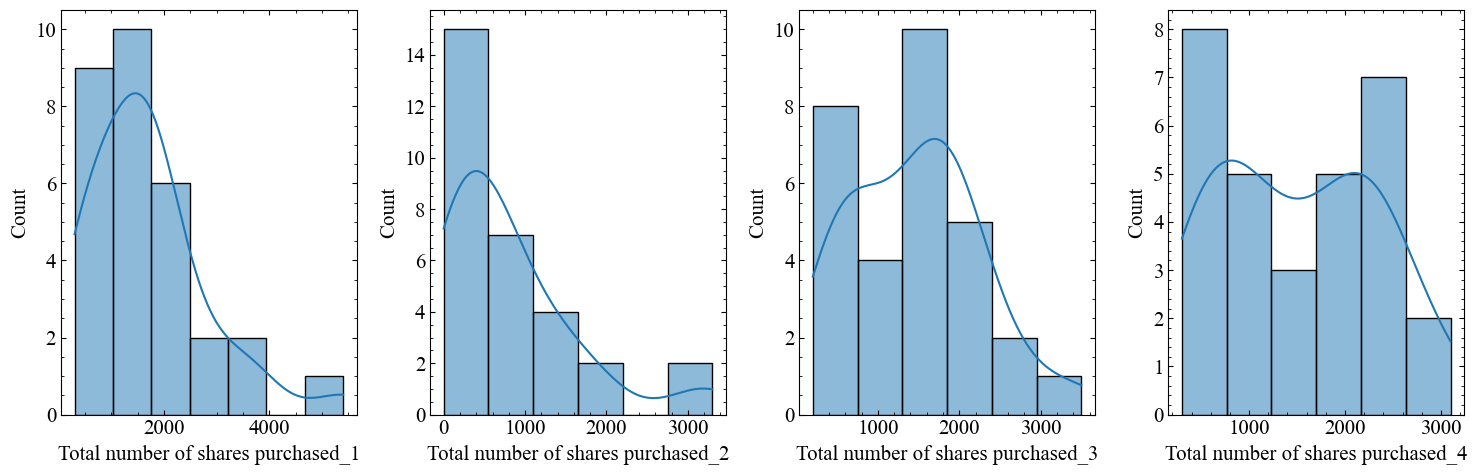

In [39]:
# 度数分布表とヒストグラムをプロット
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))  # 必要に応じて図のサイズを調整 figsize=(8,5)

# ヒストグラムをプロット
for i, col in enumerate(['Total number of shares purchased_1', 'Total number of shares purchased_2', 'Total number of shares purchased_3', 'Total number of shares purchased_4']):
    ax = axes[i]
    #ax.set_title(f'Histogram with KDE - {col}')
    sns.histplot(df[col], bins='auto', kde=True, ax=ax)

plt.tight_layout()
plt.savefig("Total_num_Buy_Histogram_with_KDE.png")
plt.show()


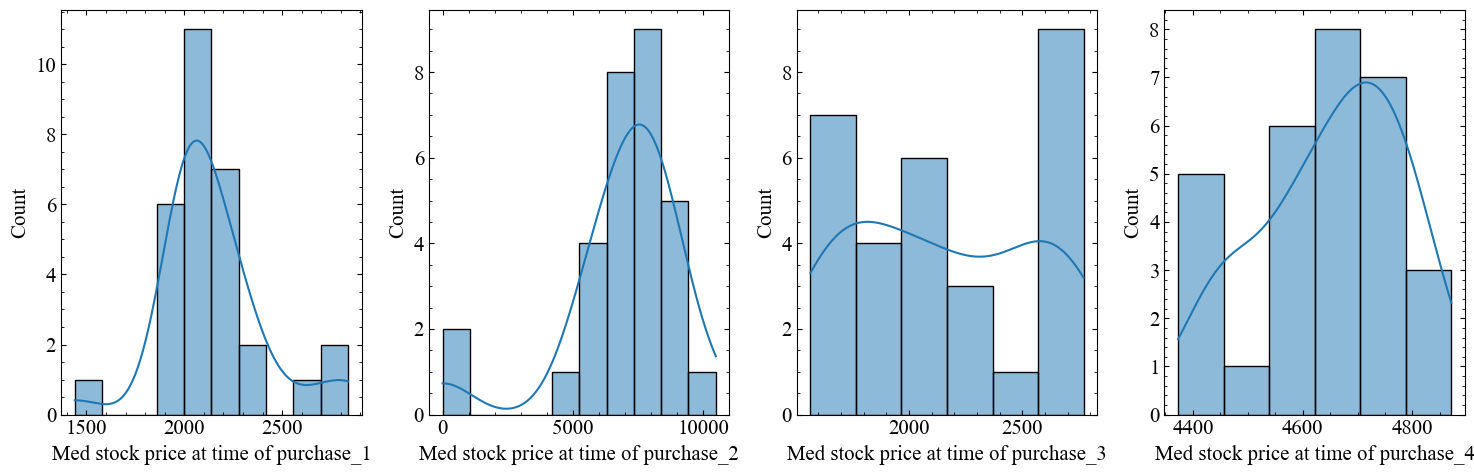

In [40]:
# 度数分布表とヒストグラムをプロット
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))  # 必要に応じて図のサイズを調整 figsize=(8,5)

# ヒストグラムをプロット
for i, col in enumerate(['Med stock price at time of purchase_1', 'Med stock price at time of purchase_2', 'Med stock price at time of purchase_3', 'Med stock price at time of purchase_4']):
    ax = axes[i]
    #ax.set_title(f'Histogram with KDE - {col}')
    sns.histplot(df[col], bins='auto', kde=True, ax=ax)

plt.tight_layout()
plt.savefig("Med_StockPrice_at_purchase_Histogram_with_KDE.png")
plt.show()

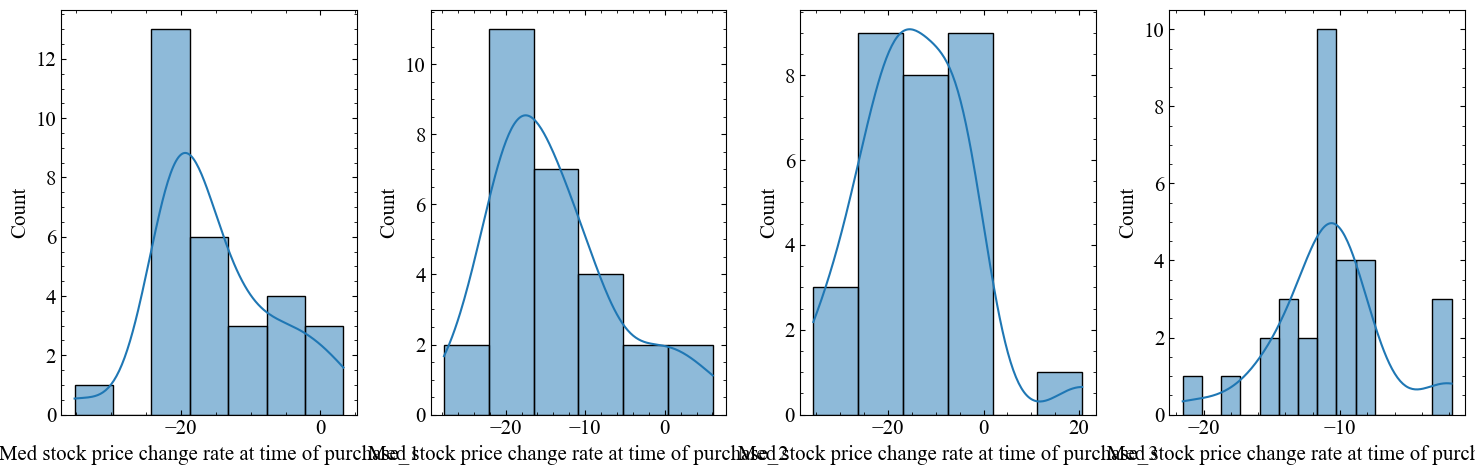

In [41]:
# 度数分布表とヒストグラムをプロット
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))  # 必要に応じて図のサイズを調整 figsize=(8,5)

# ヒストグラムをプロット
for i, col in enumerate(['Med stock price change rate at time of purchase_1', 'Med stock price change rate at time of purchase_2', 'Med stock price change rate at time of purchase_3', 'Med stock price change rate at time of purchase_4']):
    ax = axes[i]
    #ax.set_title(f'Histogram with KDE - {col}')
    sns.histplot(df[col], bins='auto', kde=True, ax=ax)

plt.tight_layout()
plt.savefig("Med_SP_CR_purchase__Histogram_with_KDE.png")
plt.show()

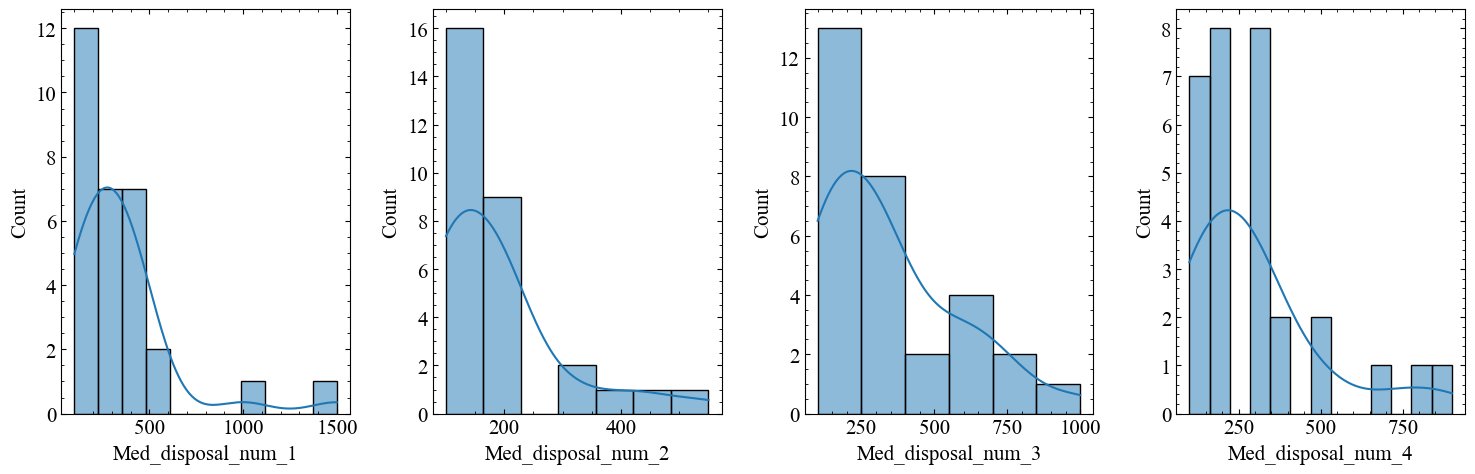

In [42]:
# 度数分布表とヒストグラムをプロット
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))  # 必要に応じて図のサイズを調整 figsize=(8,5)

# ヒストグラムをプロット
for i, col in enumerate(['Med_disposal_num_1','Med_disposal_num_2','Med_disposal_num_3','Med_disposal_num_4']):
    ax = axes[i]
    #ax.set_title(f'Histogram with KDE - {col}')
    sns.histplot(df[col], bins='auto', kde=True, ax=ax)

plt.tight_layout()
plt.savefig("Med_disposal_num_Histogram_with_KDE.png")
plt.show()

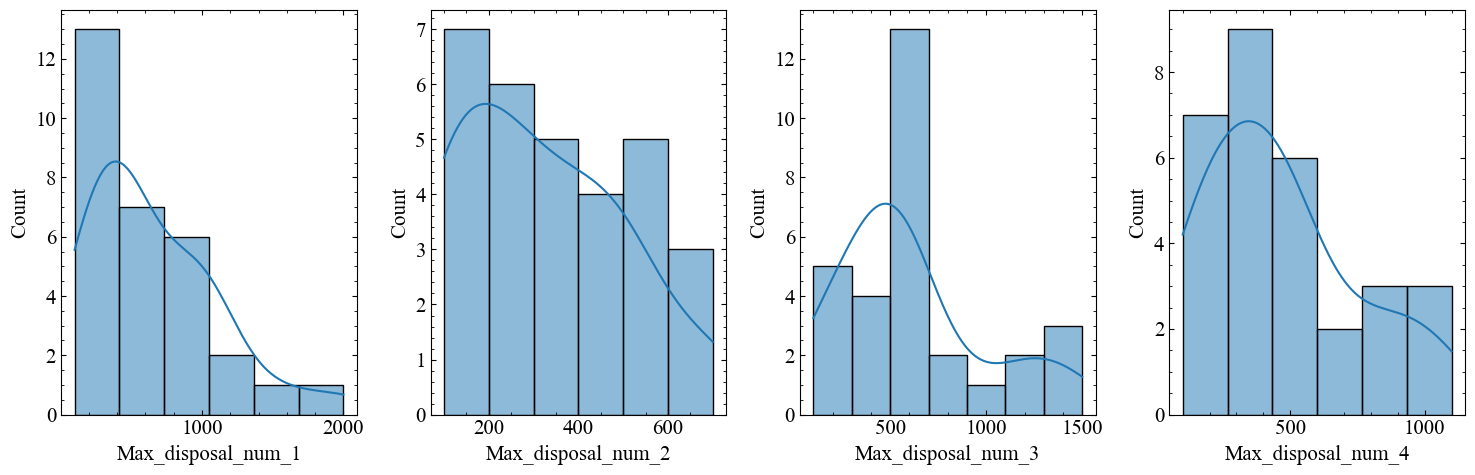

In [43]:
# 度数分布表とヒストグラムをプロット
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))  # 必要に応じて図のサイズを調整 figsize=(8,5)

# ヒストグラムをプロット
for i, col in enumerate(['Max_disposal_num_1','Max_disposal_num_2','Max_disposal_num_3','Max_disposal_num_4']):
    ax = axes[i]
    #ax.set_title(f'Histogram with KDE - {col}')
    sns.histplot(df[col], bins='auto', kde=True, ax=ax)

plt.tight_layout()
plt.savefig("Max_disposal_num_Histogram_with_KDE.png")
plt.show()

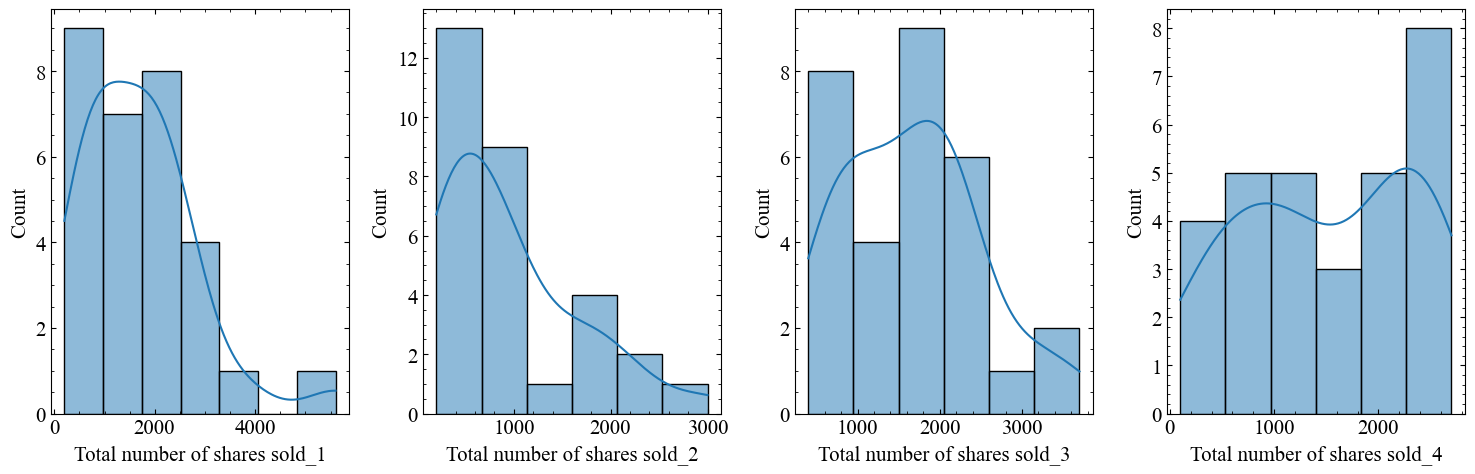

In [44]:
# 度数分布表とヒストグラムをプロット
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))  # 必要に応じて図のサイズを調整 figsize=(8,5)

# ヒストグラムをプロット
for i, col in enumerate(['Total number of shares sold_1','Total number of shares sold_2','Total number of shares sold_3','Total number of shares sold_4']):
    ax = axes[i]
    #ax.set_title(f'Histogram with KDE - {col}')
    sns.histplot(df[col], bins='auto', kde=True, ax=ax)

plt.tight_layout()
plt.savefig("Total_shares_sold_Histogram_with_KDE.png")
plt.show()

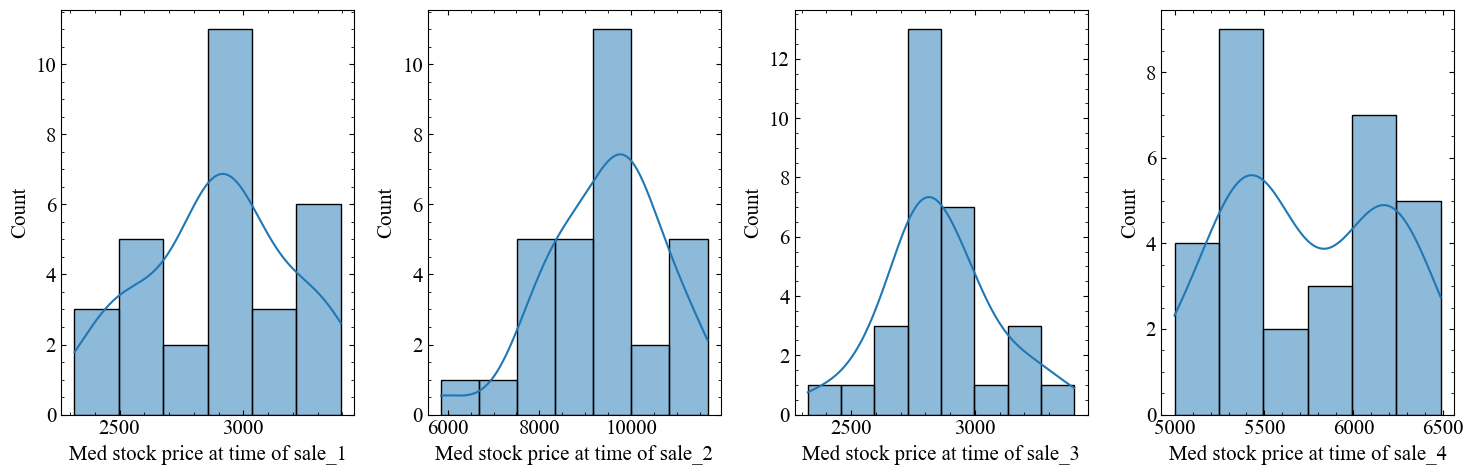

In [45]:
# 度数分布表とヒストグラムをプロット
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))  # 必要に応じて図のサイズを調整 figsize=(8,5)

# ヒストグラムをプロット
for i, col in enumerate(['Med stock price at time of sale_1','Med stock price at time of sale_2','Med stock price at time of sale_3','Med stock price at time of sale_4']):
    ax = axes[i]
    #ax.set_title(f'Histogram with KDE - {col}')
    sns.histplot(df[col], bins='auto', kde=True, ax=ax)

plt.tight_layout()
plt.savefig("Med_StockPrice_sold_Histogram_with_KDE.png")
plt.show()

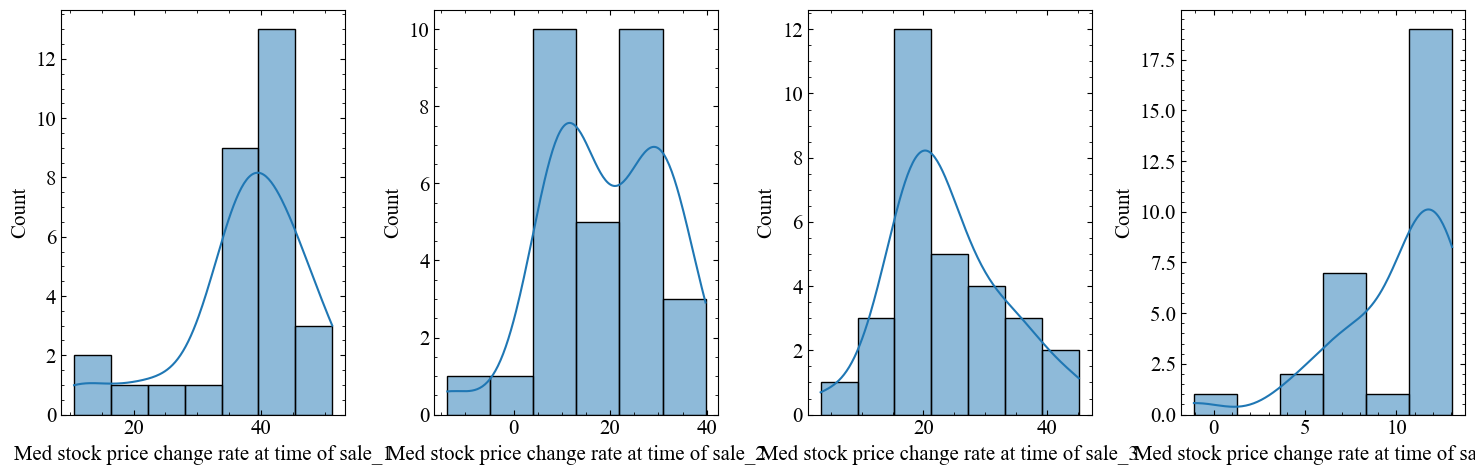

In [46]:

# 度数分布表とヒストグラムをプロット
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))  # 必要に応じて図のサイズを調整 figsize=(8,5)

# ヒストグラムをプロット
for i, col in enumerate(['Med stock price change rate at time of sale_1','Med stock price change rate at time of sale_2','Med stock price change rate at time of sale_3','Med stock price change rate at time of sale_4']):
    ax = axes[i]
    #ax.set_title(f'Histogram with KDE - {col}')
    sns.histplot(df[col], bins='auto', kde=True, ax=ax)

plt.tight_layout()
plt.savefig("Med_SP_CR_sold_Histogram_with_KDE.png")
plt.show()